# Чисельне диференціювання і інтегрування

In [35]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

In [36]:
def func(x):
    return 1/np.sqrt(2*x*x+3)

In [37]:
x_arr = [i/10 for i in np.arange(8, 13)]
x_arr = np.array(x_arr)

In [38]:
x_arr

array([0.8, 0.9, 1. , 1.1, 1.2])

# Диференціювання функції

In [39]:
def first_derivative_array(x_array, function):
    h = x_array[1] - x_array[0]
    first_der_arr = []
    first_der_arr.append((function(x_array[1]) - function(x_array[0]))/h)
    first_der_arr.append((function(x_array[2]) - function(x_array[0]))/(2*h))
    for i in np.arange(2, np.size(x_array) - 2):
        first_der_arr.append((-function(x_array[i+2]) + 8*function(x_array[i+1]) - 8*function(x_array[i-1]) + function(x_array[i-2]))/(12*h))
    first_der_arr.append((function(x_array[np.size(x_array) - 1]) - function(x_array[np.size(x_array) - 3]))/(2*h))
    first_der_arr.append((function(x_array[np.size(x_array) - 1]) - function(x_array[np.size(x_array )- 2]))/h)
    return np.array(first_der_arr)

In [40]:
def second_derivative_array(x_array, function):
    h = x_array[1] - x_array[0]
    sec_der_arr = []
    sec_der_arr.append((function(x_array[2]) - 2*function(x_array[1]) + function(x_array[0]))/(h*h))
    sec_der_arr.append((function(x_array[2]) - 2*function(x_array[1]) + function(x_array[0]))/(h*h))
    for i in np.arange(2, np.size(x_array) - 2):
        sec_der_arr.append((-function(x_array[i+2]) + 16*function(x_array[i+1]) -30*function(x_array[i]) + 16*function(x_array[i-1]) - function(x_array[i-2]))/(12*h*h))
    sec_der_arr.append((function(x_array[np.size(x_array) - 1]) - 2*function(x_array[np.size(x_array) - 2]) + function(x_array[np.size(x_array) - 3]))/(h*h))
    sec_der_arr.append((function(x_array[np.size(x_array) - 1]) - 2*function(x_array[np.size(x_array) - 2]) + function(x_array[np.size(x_array) - 3]))/(h*h))
    return np.array(sec_der_arr)

In [41]:
def interpolating_polynomial(x_array, y_array):
    x = symbols('x')
    polynomyal = 0
    for i in np.arange(np.size(x_array)):
        prod = 1
        for j in np.arange(np.size(x_array)):
            if j == i:
                continue
            prod *= ((x-x_array[j])/(x_array[i] - x_array[j]))
        polynomyal += y_array[i]*prod
    return polynomyal

In [42]:
def first_func_derivative(x):
    return -2*x/np.sqrt((2*x*x+3)**3)

In [43]:
def second_func_derivative(x):
    return 12*x*x/np.sqrt((2*x*x+3)**5) - 2/np.sqrt((2*x*x+3)**3) 

In [44]:
x = symbols('x')
polynomial = interpolating_polynomial(x_arr, func(x_arr))

In [45]:
simplify(polynomial)

-0.0302800847636036*x**4 + 0.157408349194611*x**3 - 0.272657048810288*x**2 + 0.0153198809330206*x + 0.577422498947044

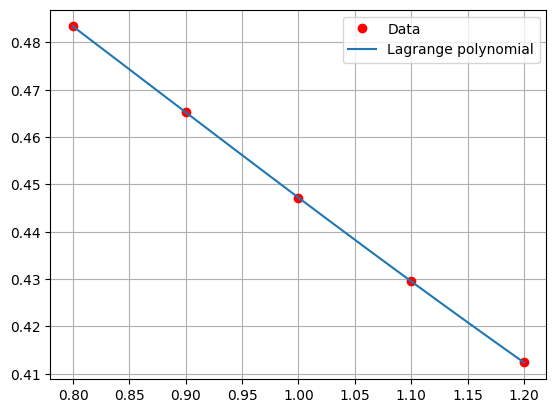

In [46]:
plt.plot(x_arr, func(x_arr), "ro", label = "Data")
plt.plot(np.linspace(0.8, 1.2, 100), lambdify(x, polynomial)(np.linspace(0.8, 1.2, 100)), label = "Lagrange polynomial")
plt.grid()
plt.legend()
plt.show()

## Перша похідна

### За допомогою формул

In [47]:
first_derivative_array(x_arr, func)

array([-0.18126139, -0.18077325, -0.17888951, -0.17410273, -0.1714373 ])

### За допомгою диференціювання многочлена Лагранжа

In [48]:
lambdify(x, diff(polynomial, x))(x_arr)

array([-0.18072098, -0.18125725, -0.17888951, -0.17434449, -0.16834891])

### Справжні значення

In [49]:
first_func_derivative(x_arr)

array([-0.18069841, -0.18126316, -0.17888544, -0.17435072, -0.16832369])

### Співвідношення величин похибок до порядку точнсті різницевої схеми

In [50]:
h = x_arr[1] - x_arr[0]

In [51]:
print(f"В точці x_0: {(first_func_derivative(x_arr) - first_derivative_array(x_arr, func))[0]/h}")
print(f"В точці x_1: {(first_func_derivative(x_arr) - first_derivative_array(x_arr, func))[1]/(h*h)}")
print(f"В точці x_2: {(first_func_derivative(x_arr) - first_derivative_array(x_arr, func))[2]/(h**4)}")
print(f"В точці x_3: {(first_func_derivative(x_arr) - first_derivative_array(x_arr, func))[3]/(h*h)}")
print(f"В точці x_4: {(first_func_derivative(x_arr) - first_derivative_array(x_arr, func))[4]/h}")

В точці x_0: 0.005629840685503763
В точці x_1: -0.04899127554626739
В точці x_2: 0.04069959808727933
В точці x_3: -0.024799194782962344
В точці x_4: 0.03113608022675019


## Друга похідна

### За допомгою формул

In [52]:
second_derivative_array(x_arr, func)

array([0.00976296, 0.00976296, 0.03577498, 0.05330857, 0.05330857])

### За допомогою диференціювання многочлена Лагранжа

In [53]:
lambdify(x, diff(polynomial, x, 2))(x_arr)

array([-0.02230507,  0.01036856,  0.03577498,  0.05391418,  0.06478615])

### Справжні значення

In [54]:
second_func_derivative(x_arr)

array([-0.02322059,  0.01046252,  0.03577709,  0.05380834,  0.0658409 ])

### Співвідношення величин похибок до порядку точнсті різницевої схеми

In [55]:
print(f"В точці x_0: {(second_func_derivative(x_arr) - second_derivative_array(x_arr, func))[0]/h}")
print(f"В точці x_1: {(second_func_derivative(x_arr) - second_derivative_array(x_arr, func))[1]/(h*h)}")
print(f"В точці x_2: {(second_func_derivative(x_arr) - second_derivative_array(x_arr, func))[2]/(h**4)}")
print(f"В точці x_3: {(second_func_derivative(x_arr) - second_derivative_array(x_arr, func))[3]/(h*h)}")
print(f"В точці x_4: {(second_func_derivative(x_arr) - second_derivative_array(x_arr, func))[4]/h}")

В точці x_0: -0.32983552394999605
В точці x_1: 0.0699557502869342
В точці x_2: 0.021072569963698235
В точці x_3: 0.0499766410863495
В точці x_4: 0.125323259736104


# Інтегрування функції

### Справжнє значення

In [56]:
def func_antiderivative(x):
    return 1/(2*np.sqrt(2))*(np.log(1+np.sqrt(2*x*x/(2*x*x+3))) - 
                             np.log(1-np.sqrt(2*x*x/(2*x*x+3))))

In [57]:
I = func_antiderivative(1.2) - func_antiderivative(0.8)
print(I)

0.17897696063520452


## Метод трапецій

In [58]:
sum = 0
h = 0.1
x_1 = x_arr[0]
for i in np.arange(4):
    sum += ((func(x_1 + i*h) + func(x_1 + (i+1)*h))/2)*h
I1 = sum
print(sum)
print(abs(sum - I)/I*100)

0.17898731272587476
0.00578403534929853


In [59]:
sum = 0
h = 0.05
for i in np.arange(8):
    sum += ((func(x_1 + i*h) + func(x_1 + (i+1)*h))/2)*h
I2 = sum
print(sum)
print(abs(sum - I)/I*100)

0.17897954118857962
0.0014418355110843134


In [60]:
sum = 0
h = 0.025
for i in np.arange(16):
    sum += ((func(x_1 + i*h) + func(x_1 + (i+1)*h))/2)*h
print(sum)
print(abs(sum - I)/I*100)

0.17897760530709064
0.0003601982533596302


In [61]:
i = 4/3*I2 - 1/3*I1
print(i)
print(abs(i - I)/I*100)

0.1789769506761479
5.564434981922637e-06


## Метод лівих прямокутників

In [62]:
def left_rect(function, a, b, epsilon):
    epsilon_k = 10
    h = b - a
    k = 1
    sum = 0
    count = 0
    while epsilon_k >= epsilon:
        h /= 2
        k *= 2
        sum_new = 0
        for i in np.arange(k - 1):
            sum_new += function(a + i*h)*h
        epsilon_k = abs(sum_new - sum)
        sum = sum_new
        count += 1
    print(f"Number of iterations {count}")
    print(f"Error: {epsilon_k}")
    return sum

In [63]:
left_rect(func, 0.8, 1.2, 10**(-3))

Number of iterations 8
Error: 0.0005901409327928597


0.17838763731229687

## Метод Сімпсона

In [64]:
def simpsons_rule(function, a ,b, epsilon):
    epsilon_k = 10
    h = b - a
    k = 1
    sum = 0
    count = 0
    while epsilon_k >= epsilon:
        h /= 2
        k *= 2
        sum_new = 0
        for i in np.arange(k -1):
            if i == 0:
                sum_new += function(a+i*h)
            elif i == k-1:
                sum_new += function(a+i*h)
            elif i % 2 == 0:
                sum_new += 2*function(a+i*h)
            elif i % 2 == 1:
                sum_new += 4*function(a+i*h)
        sum_new = sum_new * (h/3)
        epsilon_k = abs(sum_new - sum)
        sum = sum_new
        count += 1
    print(f"Number of iterations {count}")
    print(f"Error: {1/15*epsilon_k}")
    return sum

In [65]:
simpsons_rule(func, 0.8, 1.2, 10**(-3))

Number of iterations 9
Error: 3.582541395695619e-05


0.17843985351567507